In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression , Ridge, Lasso , RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR,NuSVR,SVR

# Machine Learning Metrics
from sklearn import metrics

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
# Read in data into dataframes 
train_features = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_features_with_score_SiteEnergyUseWN(kBtu).csv')
test_features = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_features_with_score_SiteEnergyUseWN(kBtu).csv')
train_labels = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_labels_with_score_SiteEnergyUseWN(kBtu).csv')
test_labels = pd.read_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_labels_with_score_SiteEnergyUseWN(kBtu).csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (4690, 8)
Testing Feature Size:   (2010, 8)
Training Labels Size:   (4690, 1)
Testing Labels Size:    (2010, 1)


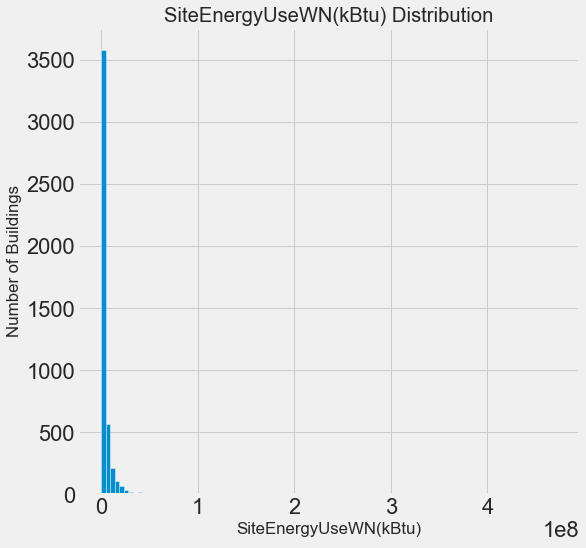

In [3]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['SiteEnergyUseWN(kBtu)'].dropna(), bins = 100);
plt.xlabel('SiteEnergyUseWN(kBtu)'); plt.ylabel('Number of Buildings'); 
plt.title('SiteEnergyUseWN(kBtu) Distribution');

In [4]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
X_train=imp.fit_transform(train_features)
X_test = imp.transform(test_features)
X_train

array([[ 1.92000000e+03,  1.00000000e+00,  4.00000000e+00, ...,
         6.72089808e+01,  4.75932200e+01, -1.22324910e+02],
       [ 1.97800000e+03,  1.00000000e+00,  4.00000000e+00, ...,
         5.40000000e+01,  4.76706099e+01, -1.22312744e+02],
       [ 1.90900000e+03,  1.00000000e+00,  3.00000000e+00, ...,
         6.72082529e+01,  4.75976868e+01, -1.22325378e+02],
       ...,
       [ 1.93100000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         6.72289787e+01,  4.76303400e+01, -1.22374120e+02],
       [ 2.00500000e+03,  1.00000000e+00,  5.00000000e+00, ...,
         8.30000000e+01,  4.76185600e+01, -1.22321940e+02],
       [ 2.00700000e+03,  1.00000000e+00,  4.00000000e+00, ...,
         3.40000000e+01,  4.76602669e+01, -1.22398534e+02]])

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Transform both training data and testing data
X_train = imputer.fit_transform(train_features)
X_test = imputer.transform(test_features)

In [5]:
print('Missing values in training features: ', np.sum(np.isnan(X_train)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [6]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [7]:
# Create the scaler object with a range of 0-1
#scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

# Transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Convert y to one-dimensional array (vector)
y_train = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [9]:
#transforming the X_train and y_train back to a dataframe with imputed values for Hyperparameter Tuner
train_df = train_features.copy()
train_df
#yearbuilt= train_df['YearBuilt']
#latitude= train_df['Latitude']
#longitude= train_df['Longitude']
#train_df.drop(['YearBuilt','Latitude','Longitude'],axis=1)
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(train_df.columns, IterativeImputer(max_iter=10, random_state=0))])
imputed_features = mapper.fit_transform(train_df.copy(), 8)
imputed_features_df = pd.DataFrame(imputed_features, index=train_df.index, columns=train_df.columns)
mapper = DataFrameMapper([(imputed_features_df.columns, StandardScaler())])
scaled_features = mapper.fit_transform(imputed_features_df.copy(), 8)
scaled_features_df = pd.DataFrame(scaled_features, index=imputed_features_df.index, columns=imputed_features_df.columns)
scaled_features_df['target']=train_labels
#scaled_features_df['YearBuilt']=yearbuilt
#scaled_features_df['Latitude']=latitude
#scaled_features_df['Longitude']=longitude

scaled_features_df

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,Latitude,Longitude,target
0,-1.455461,-0.040009,-0.134789,-0.364239,-0.280445,-0.031968,-0.641109,0.355726,3.187032e+05
1,0.302971,-0.040009,-0.134789,-0.308225,-0.144122,-0.589444,0.984379,0.803178,9.270320e+05
2,-1.788957,-0.040009,-0.315426,-0.364140,-0.280445,-0.031999,-0.547290,0.338497,1.071527e+06
3,1.151870,-0.040009,-0.496063,-0.298847,0.392400,0.008135,-0.167346,-0.722148,2.271686e+06
4,0.939645,-0.040009,1.490941,0.623551,-0.280445,-2.193208,-0.139220,-0.693355,1.400268e+07
5,0.242336,-0.040009,-0.315426,-0.287049,-0.280445,0.212438,1.964631,1.354665,7.169406e+05
6,-1.243237,-0.040009,-0.676699,-0.354216,-0.280445,-0.031490,-1.439046,0.003743,8.720143e+05
7,1.394412,1.586945,0.226484,0.982939,-0.280445,1.351954,1.193159,0.412367,1.043256e+07
8,-1.849593,-0.040009,0.407121,0.329634,-0.280445,1.267545,-0.529182,0.095772,4.777761e+06
9,0.879009,-0.040009,-0.134789,-0.306332,-0.074916,-0.017839,0.934031,1.275684,1.623130e+06


In [10]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))


# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model, ridgelasso=True):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evaluate
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    model_mse = metrics.mean_squared_error(y_test, model_pred)
    model_rmse = np.sqrt(metrics.mean_squared_error(y_test, model_pred))
    model_r2 = metrics.r2_score(y_test, model_pred)
        
    #Ridge and lasso regressor parameters and GridSearchCV
    if ridgelasso:
        parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10,20]}
        model_regressor = GridSearchCV(model, parameters, scoring = 'neg_mean_squared_error',cv = 5)
        model_regressor_fitted = model_regressor.fit(X_train,y_train)
        model_best_params = model_regressor_fitted.best_params_
        model_best_score = model_regressor_fitted.best_score_
        # Return the performance metrics for Ridge Lasso
        return (model_mae, model_mse, model_rmse, model_r2, model_best_params, model_best_score)
    else :
        # Return the performance metrics for other models
        return (model_mae, model_mse, model_rmse, model_r2)  

In [11]:
lr = LinearRegression()
lr_mae, lr_mse, lr_rmse, lr_r2 = fit_and_evaluate(lr,ridgelasso=False)

print('Linear Regression Performance on the test set: Mean Absolute Error: %.4f' % lr_mae)
print('Linear Regression Performance on the test set: Mean Squared Error: %.4f ' % lr_mse)
print('Linear Regression Performance on the test set: Root Mean Squared Error: %.4f' % lr_rmse)
print('Linear Regression Performance on the test set: R^2: %.4f' % lr_r2)

Linear Regression Performance on the test set: Mean Absolute Error: 3436737.2793
Linear Regression Performance on the test set: Mean Squared Error: 133168080981324.1250 
Linear Regression Performance on the test set: Root Mean Squared Error: 11539847.5285
Linear Regression Performance on the test set: R^2: 0.3437


In [12]:
ridge = Ridge(alpha=1)
ridge_mae, ridge_mse, ridge_rmse, ridge_r2, ridge_best_params, ridge_best_score = fit_and_evaluate(ridge)

print('Ridge Regression Performance on the test set: Mean Absolute Error: %.4f' % ridge_mae)
print('Ridge Regression Performance on the test set: Mean Squared Error: %.4f ' % ridge_mse)
print('Ridge Regression Performance on the test set: Root Mean Squared Error: %.4f' % ridge_rmse)
print('Ridge Regression Performance on the test set: R^2: %.4f' % ridge_r2)
print('Ridge Regression Performance on the test set: Best Parameter: ',ridge_best_params)
print('Ridge Regression Performance on the test set: Best Score: %.4f' %ridge_best_score)

Ridge Regression Performance on the test set: Mean Absolute Error: 3436436.6840
Ridge Regression Performance on the test set: Mean Squared Error: 133177141765335.8438 
Ridge Regression Performance on the test set: Root Mean Squared Error: 11540240.1087
Ridge Regression Performance on the test set: R^2: 0.3437
Ridge Regression Performance on the test set: Best Parameter:  {'alpha': 20}
Ridge Regression Performance on the test set: Best Score: -287502990599009.1875


In [13]:
lasso = Lasso(alpha=20,max_iter=1000000)
lasso_mae, lasso_mse, lasso_rmse, lasso_r2, lasso_best_params, lasso_best_score = fit_and_evaluate(lasso)


print('Lasso Regression Performance on the test set: Mean Absolute Error: %.4f' % lasso_mae)
print('Lasso Regression Performance on the test set: Mean Squared Error: %.4f ' % lasso_mse)
print('Lasso Regression Performance on the test set: Root Mean Squared Error: %.4f' % lasso_rmse)
print('Lasso Regression Performance on the test set: R^2: %.4f' % lasso_r2)
print('Lasso Regression Performance on the test set: Best Parameter: ',lasso_best_params)
print('Lasso Regression Performance on the test set: Best Score: %.4f' %lasso_best_score)

Lasso Regression Performance on the test set: Mean Absolute Error: 3436731.5635
Lasso Regression Performance on the test set: Mean Squared Error: 133168176458103.6875 
Lasso Regression Performance on the test set: Root Mean Squared Error: 11539851.6653
Lasso Regression Performance on the test set: R^2: 0.3437
Lasso Regression Performance on the test set: Best Parameter:  {'alpha': 20}
Lasso Regression Performance on the test set: Best Score: -291684025530984.2500


In [14]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
elastic_mae, elastic_mse, elastic_rmse, elastic_r2= fit_and_evaluate(elastic,ridgelasso=False)

print('Elastic Regression Performance on the test set: Mean Absolute Error: %.4f' % elastic_mae)
print('Elastic Regression Performance on the test set: Mean Squared Error: %.4f ' % elastic_mse)
print('Elastic Regression Performance on the test set: Root Mean Squared Error: %.4f' % elastic_rmse)
print('Elastic Regression Performance on the test set: R^2: %.4f' % elastic_r2)

Elastic Regression Performance on the test set: Mean Absolute Error: 3766656.3886
Elastic Regression Performance on the test set: Mean Squared Error: 152755493958069.9688 
Elastic Regression Performance on the test set: Root Mean Squared Error: 12359429.3541
Elastic Regression Performance on the test set: R^2: 0.2472


In [15]:
#svm = SVR(kernel='poly',C = 100.0,max_iter=100000)
#svm = NuSVR(kernel='linear',C = 100.0,max_iter=100000)
svm = LinearSVR(C = 500.0,epsilon=488,loss='squared_epsilon_insensitive',max_iter=100000)
svm_mae, svm_mse, svm_rmse, svm_r2 = fit_and_evaluate(svm,ridgelasso=False)

print('Support Vector Machine Regression Performance on the test set: Mean Absolute Error %0.4f' % svm_mae)
print('Support Vector Machine Regression Performance on the test set: Mean Squared Error %.4f' % svm_mse)
print('Support Vector Machine Regression Performance on the test set: Root Mean Squared Error %.4f' %  svm_rmse)
print('Support Vector Machine Regression Performance on the test set: R^2 %.4f' % svm_r2)

Support Vector Machine Regression Performance on the test set: Mean Absolute Error 3285360.8683
Support Vector Machine Regression Performance on the test set: Mean Squared Error 113179937953601.6406
Support Vector Machine Regression Performance on the test set: Root Mean Squared Error 10638606.0155
Support Vector Machine Regression Performance on the test set: R^2 0.4422


In [31]:
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]


reg = LinearSVR(C=100,max_iter=100000, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 500, name='C'),
          Integer(1, 500, name='epsilon')]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_SVR = forest_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_SVR.fun

print("""Best parameters:
- C=%d
- epsilon=%d
""" % (res_SVR.x[0], res_SVR.x[1]))

Best parameters:
- C=500
- epsilon=488



In [16]:
random_forest = RandomForestRegressor(random_state=60,n_estimators=100,max_depth=18,max_features=7,
                                      min_samples_leaf=2,min_samples_split=3)
rf_mae, rf_mse, rf_rmse, rf_r2 = fit_and_evaluate(random_forest,ridgelasso=False)

"""
Best parameters:
- max_depth=18
- max_features=7
- min_samples_split=3
- min_samples_leaf=2
"""

print('Random Forest Regression Performance on the test set: Mean Absolute Error:  %0.4f' % rf_mae)
print('Random Forest Regression Performance on the test set: Mean Squared Error: %.4f' % rf_mse)
print('Random Forest Regression Performance on the test set: Root Mean Squared Error: %.4f' % rf_rmse)
print('Random Forest Regression Performance on the test set: R^2: %.4f' % rf_r2)

Random Forest Regression Performance on the test set: Mean Absolute Error:  2081868.9733
Random Forest Regression Performance on the test set: Mean Squared Error: 57205696228306.1484
Random Forest Regression Performance on the test set: Root Mean Squared Error: 7563444.7329
Random Forest Regression Performance on the test set: R^2: 0.7181


In [60]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = RandomForestRegressor(n_estimators=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 20, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gp = forest_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3]
                            ))

Best parameters:
- max_depth=18

- max_features=7
- min_samples_split=3
- min_samples_leaf=2


In [17]:
gradient_boosted = GradientBoostingRegressor(n_estimators=500,max_depth=5,random_state=0,
                                             learning_rate=0.313787,max_features=8,
                                             min_samples_split=9,min_samples_leaf=14)
"""
Best parameters:
- max_depth=5
- learning_rate=0.313787
- max_features=8
- min_samples_split=9
- min_samples_leaf=14
"""

gb_mae , gb_mse, gb_rmse, gb_r2 = fit_and_evaluate(gradient_boosted,ridgelasso=False)

print('Gradient Boosted Regression Performance on the test set: Mean Absolute Error:  %0.4f' % gb_mae)
print('Gradient Boosted Regression Performance on the test set: Mean Squared Error: %.4f ' % gb_mse)
print('Gradient Boosted Regression Performance on the test set: Root Mean Squared Error: %.4f' % gb_rmse)
print('Gradient Boosted Regression Performance on the test set: R^2: %.4f' % gb_r2)

Gradient Boosted Regression Performance on the test set: Mean Absolute Error:  2234107.0078
Gradient Boosted Regression Performance on the test set: Mean Squared Error: 59631271237176.5859 
Gradient Boosted Regression Performance on the test set: Root Mean Squared Error: 7722128.6727
Gradient Boosted Regression Performance on the test set: R^2: 0.7061


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=500, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gp = forest_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3], 
                            res_gp.x[4]))

Best parameters:
- max_depth=5
- learning_rate=0.313787
- max_features=8
- min_samples_split=9
- min_samples_leaf=14


In [18]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae, knn_mse, knn_rmse, knn_r2 = fit_and_evaluate(knn,ridgelasso=False)

print('K-Nearest Neighbors Regression Performance on the test set: Mean Absolute Error: %0.4f' % knn_mae)
print('K-Nearest Neighbors Regression Performance on the test set: Mean Squared Error: %.4f' % knn_mse)
print('K-Nearest Neighbors Regression Performance on the test set: Root Mean Squared Error: %.4f'% knn_rmse)
print('K-Nearest Neighbors Regression Performance on the test set: R^2: %.4f' % knn_r2)

K-Nearest Neighbors Regression Performance on the test set: Mean Absolute Error: 2992081.2195
K-Nearest Neighbors Regression Performance on the test set: Mean Squared Error: 102801223927123.0781
K-Nearest Neighbors Regression Performance on the test set: Root Mean Squared Error: 10139093.8415
K-Nearest Neighbors Regression Performance on the test set: R^2: 0.4934


In [19]:
import xgboost as xgb

    
xgboost = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree=0.778796, colsample_bylevel=0.612286,
                           colsample_bynode=0.908607,learning_rate = 0.016363,max_depth = 21, reg_alpha = 4,
                           n_estimators = 500,subsample=0.943878,min_child_weight=1.0,random_state=0,
                           reg_lamba=3)

"""
Best parameters:
- max_depth=21
- learning_rate=0.016363
- min_child_weight=1
- subsample=0.943878
- colsample_bytree=0.778796
- colsample_bylevel=0.612286
- colsample_bynode=0.908607
- reg_alpha=4
- reg_lambda=3
"""

xg_mae, xg_mse, xg_rmse, xg_r2 = fit_and_evaluate(xgboost,ridgelasso=False)
      
print('xgboost Regression Performance on the test set: Mean Absolute Error: %0.4f' % xg_mae)
print('xgboost Regression Performance on the test set: Mean Squared Error: %.4f' % xg_mse)
print('xgboost Regression Performance on the test set: Root Mean Squared Error: %.4f'% xg_rmse)
print('xgboost Regression Performance on the test set: R^2: %.4f' % xg_r2)

xgboost Regression Performance on the test set: Mean Absolute Error: 1660813.3060
xgboost Regression Performance on the test set: Mean Squared Error: 70889102728069.1250
xgboost Regression Performance on the test set: Root Mean Squared Error: 8419566.6592
xgboost Regression Performance on the test set: R^2: 0.6506


In [24]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = xgb.XGBRegressor(n_estimators=500, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space =[
        Integer(1, 30, name='max_depth'),
        Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
        Integer(1, 10, name='min_child_weight'),
        Real(0.8, 1.0, "log-uniform", name='subsample'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bytree'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bylevel'),
        Real(0.6, 1.0, "log-uniform", name='colsample_bynode'),
        Integer(1, 30, name='reg_alpha'),
        Integer(1, 30, name='reg_lambda')
       ]



# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,gbrt_minimize,forest_minimize
res_gpxgb = forest_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gpxgb.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- min_child_weight=%d
- subsample=%.6f
- colsample_bytree=%.6f
- colsample_bylevel=%.6f
- colsample_bynode=%.6f
- reg_alpha=%d
- reg_lambda=%d
     """ % (res_gpxgb.x[0], res_gpxgb.x[1], 
                            res_gpxgb.x[2], res_gpxgb.x[3], 
                            res_gpxgb.x[4],res_gpxgb.x[5],res_gpxgb.x[6],res_gpxgb.x[7],res_gpxgb.x[8]))

Best parameters:
- max_depth=21
- learning_rate=0.016363
- min_child_weight=1
- subsample=0.943878
- colsample_bytree=0.778796
- colsample_bylevel=0.612286
- colsample_bynode=0.908607
- reg_alpha=4
- reg_lambda=3
     


In [20]:
import lightgbm as lgb

LGBM = lgb.LGBMRegressor(learning_rate=0.174778,
                        n_estimators=500,
                        max_depth=11,
                        num_leaves=21,random_state=0)

lgbm_mae, lgbm_mse, lgbm_rmse, lgbm_r2 = fit_and_evaluate(LGBM,ridgelasso=False)
      
print('lightgbm Regression Performance on the test set: Mean Absolute Error: %0.4f' % lgbm_mae)
print('lightgbm Regression Performance on the test set: Mean Squared Error: %.4f' % lgbm_mse)
print('lightgbm Regression Performance on the test set: Root Mean Squared Error: %.4f'% lgbm_rmse)
print('lightgbm Regression Performance on the test set: R^2: %.4f' % lgbm_r2)

lightgbm Regression Performance on the test set: Mean Absolute Error: 2158064.1348
lightgbm Regression Performance on the test set: Mean Squared Error: 48540242517831.8672
lightgbm Regression Performance on the test set: Root Mean Squared Error: 6967082.7839
lightgbm Regression Performance on the test set: R^2: 0.7608


In [28]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = lgb.LGBMRegressor(n_estimators=500, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 20, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 30, name='num_leaves')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gplgbm = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gplgbm.fun

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- num_leaves=%d
""" % (res_gplgbm.x[0],res_gplgbm.x[1], res_gplgbm.x[2]))

Best parameters:
- max_depth=11
- learning_rate=0.174778
- num_leaves=21



In [21]:
from catboost import CatBoostRegressor

CatBoost = CatBoostRegressor(iterations=100,learning_rate=0.171061, depth=5, verbose=True,l2_leaf_reg=11,random_state=0,loss_function='RMSE',score_function='Cosine')

#Best By SKOPT :
#iterations=100,learning_rate=0.353690, depth=8, verbose=True,l2_leaf_reg=2,loss_function='RMSE',score_function='Cosine'

catb_mae, catb_mse, catb_rmse, catb_r2 = fit_and_evaluate(CatBoost,ridgelasso=False)
      
print('CatBoost Regression Performance on the test set: Mean Absolute Error: %0.4f' % catb_mae)
print('CatBoost Regression Performance on the test set: Mean Squared Error: %.4f' % catb_mse)
print('CatBoost Regression Performance on the test set: Root Mean Squared Error: %.4f'% catb_rmse)
print('CatBoost Regression Performance on the test set: R^2: %.4f' % catb_r2)

0:	learn: 15263607.9109299	total: 105ms	remaining: 10.4s
1:	learn: 14584239.5708311	total: 144ms	remaining: 7.07s
2:	learn: 14021898.6596756	total: 180ms	remaining: 5.82s
3:	learn: 13603154.5854979	total: 217ms	remaining: 5.21s
4:	learn: 13072657.8822489	total: 253ms	remaining: 4.8s
5:	learn: 12669458.8440778	total: 287ms	remaining: 4.49s
6:	learn: 12324660.8246499	total: 326ms	remaining: 4.33s
7:	learn: 11896456.5978751	total: 368ms	remaining: 4.23s
8:	learn: 11668052.9693998	total: 407ms	remaining: 4.11s
9:	learn: 11454593.0406115	total: 443ms	remaining: 3.99s
10:	learn: 11186283.2650950	total: 484ms	remaining: 3.91s
11:	learn: 11004200.0763611	total: 525ms	remaining: 3.85s
12:	learn: 10796616.4030883	total: 562ms	remaining: 3.76s
13:	learn: 10619727.9388643	total: 601ms	remaining: 3.69s
14:	learn: 10448079.2512128	total: 642ms	remaining: 3.64s
15:	learn: 10403925.6755653	total: 678ms	remaining: 3.56s
16:	learn: 10267463.8976253	total: 714ms	remaining: 3.49s
17:	learn: 10142337.40962

In [93]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = CatBoostRegressor(iterations=100, random_state=0)


from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 8, name='depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 30, name='l2_leaf_reg')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,forest_minimize
res_gpcat = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gpcat.fun

print("""Best parameters:
- depth=%d
- learning_rate=%.6f
- l2_leaf_reg=%d
""" % (res_gpcat.x[0],res_gpcat.x[1], res_gpcat.x[2]))

Best parameters:
- depth=5
- learning_rate=0.171061
- l2_leaf_reg=11



In [22]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(base_estimator=None, learning_rate=0.000826, loss='square',
         n_estimators=13, random_state=None)

""""
Best parameters:
- n_estimators=13
- learning_rate=0.000826
- loss=square
"""
adab_mae, adab_mse, adab_rmse, adab_r2 = fit_and_evaluate(ada_reg,ridgelasso=False)
      
print('AdaBoost Regression Performance on the test set: Mean Absolute Error: %0.4f' % adab_mae)
print('AdaBoost Regression Performance on the test set: Mean Squared Error: %.4f' % adab_mse)
print('AdaBoost Regression Performance on the test set: Root Mean Squared Error: %.4f'% adab_rmse)
print('AdaBoost Regression Performance on the test set: R^2: %.4f' % adab_r2)

AdaBoost Regression Performance on the test set: Mean Absolute Error: 3041599.8432
AdaBoost Regression Performance on the test set: Mean Squared Error: 113789914417697.4688
AdaBoost Regression Performance on the test set: Root Mean Squared Error: 10667235.5565
AdaBoost Regression Performance on the test set: R^2: 0.4392


In [53]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

#n_features = X_train.shape[1]

# gradient boosted trees tend to do well on problems like this
#reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
reg = AdaBoostRegressor(n_estimators=100, random_state=0)


from skopt.space import Real, Integer,Categorical
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the bounds,
# the corresponding scikit-learn parameter name, as well as how to sample values
# from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 100, name='n_estimators'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Categorical(('exponential', 'linear','square'),name='loss')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set scikit-learn
# estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=10, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize,forest_minimize,gbrt_minimize
res_gpada = gbrt_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gpada.fun

print("""Best parameters:
- n_estimators=%d
- learning_rate=%.6f
- loss=%s
""" % (res_gpada.x[0],res_gpada.x[1], res_gpada.x[2]))

Best parameters:
- n_estimators=13
- learning_rate=0.000826
- loss=square



In [179]:
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import pandas as pd
from time import time

from sklearn.datasets import load_digits
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Utility function to report best scores+timings
def report_perf(optimizer, X, y, title):
    optimizer.fit(X_train, y_train)
    print(title, "best CV score:", optimizer.best_score_)
    print(title, "best CV parameters:", optimizer.best_params_)

#define partitioning
kf = KFold(n_splits=5,random_state=22)
# build a regressor
reg = AdaBoostRegressor(n_estimators=500,random_state=32)

total_iter = 40

for baseEstimator in ['GP','RF','ET']:
    opt = BayesSearchCV(reg,
        {"n_estimators": (1,500),
                  "learning_rate": Real(1e-6, 1e+1, prior='log-uniform'),
                  "loss": ["exponential", "linear","square"]},
        n_iter=total_iter,n_jobs=-1,cv=kf,return_train_score=False,optimizer_kwargs={'base_estimator': baseEstimator})
    report_perf(opt, X_train, y_train,'BayesSearchCV_'+baseEstimator)

random_search = RandomizedSearchCV(reg, param_distributions={"n_estimators": (1,500),
                  "learning_rate": Real(1e-6, 1e+1, prior='log-uniform'),
                  "loss": ['exponential', "linear","square"]},n_iter=total_iter,n_jobs=-1,cv=kf,
                                   return_train_score=False)
report_perf(random_search, X_train, y_train,'RandomizedSearchCV')

grid_search = GridSearchCV(reg, param_grid={"n_estimators": [1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800],
                  "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
                  "loss": ["exponential", "linear","square"]},n_jobs=-1,cv=kf,return_train_score=False)
report_perf(grid_search, X_train, y_train,'GridSearchCV')

BayesSearchCV_GP best CV score: 0.4779120166599111
BayesSearchCV_GP best CV parameters: {'learning_rate': 0.03652072239992749, 'loss': 'square', 'n_estimators': 500}
BayesSearchCV_RF best CV score: 0.45399365256823865
BayesSearchCV_RF best CV parameters: {'learning_rate': 0.08688372490962794, 'loss': 'square', 'n_estimators': 124}
BayesSearchCV_ET best CV score: 0.4339904275748955
BayesSearchCV_ET best CV parameters: {'learning_rate': 0.02745520855010558, 'loss': 'linear', 'n_estimators': 143}
RandomizedSearchCV best CV score: 0.4648968595500751
RandomizedSearchCV best CV parameters: {'learning_rate': array([0.01893746]), 'loss': 'square', 'n_estimators': 500}
GridSearchCV best CV score: 0.47342020903383786
GridSearchCV best CV parameters: {'learning_rate': 0.1, 'loss': 'square', 'n_estimators': 150}


Using TensorFlow backend.
W0825 19:03:06.301071 20416 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 19:03:06.460073 20416 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 19:03:06.471073 20416 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0825 19:03:06.753073 20416 deprecation_wrapper.py:119] From c:\program files\python37\lib\site-packages\keras\backend\tensorflow_backend.py:148: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 19:03:07.459

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

Epoch 24/500
3752/3752 [==============================] - 0s 110us/step - loss: 5446963.3945 - coeff_determination: -0.2742 - val_loss: 4649712.9979 - val_coeff_determination: -0.3959

Epoch 00024: val_loss improved from 4649745.62580 to 4649712.99787, saving model to Weights-024--4649712.99787.hdf5
Epoch 25/500
3752/3752 [==============================] - 0s 103us/step - loss: 5446935.6013 - coeff_determination: -0.2630 - val_loss: 4649717.3977 - val_coeff_determination: -0.3959

Epoch 00025: val_loss did not improve from 4649712.99787
Epoch 26/500
3752/3752 [==============================] - 0s 109us/step - loss: 5446906.7207 - coeff_determination: -0.2520 - val_loss: 4649697.2271 - val_coeff_determination: -0.3959

Epoch 00026: val_loss improved from 4649712.99787 to 4649697.22708, saving model to Weights-026--4649697.22708.hdf5
Epoch 27/500
3752/3752 [==============================] - 0s 101us/step - loss: 5446876.7825 - coeff_determination: -0.2725 - val_loss: 4649643.3262 - val_c


Epoch 00052: val_loss improved from 4648455.05330 to 4648419.49254, saving model to Weights-052--4648419.49254.hdf5
Epoch 53/500
3752/3752 [==============================] - 0s 106us/step - loss: 5445770.2036 - coeff_determination: -0.2464 - val_loss: 4648239.0171 - val_coeff_determination: -0.3956

Epoch 00053: val_loss improved from 4648419.49254 to 4648239.01706, saving model to Weights-053--4648239.01706.hdf5
Epoch 54/500
3752/3752 [==============================] - 0s 108us/step - loss: 5445715.7548 - coeff_determination: -0.2620 - val_loss: 4648254.2548 - val_coeff_determination: -0.3956

Epoch 00054: val_loss did not improve from 4648239.01706
Epoch 55/500
3752/3752 [==============================] - 0s 109us/step - loss: 5445660.6119 - coeff_determination: -0.2568 - val_loss: 4648239.8358 - val_coeff_determination: -0.3956

Epoch 00055: val_loss did not improve from 4648239.01706
Epoch 56/500
3752/3752 [==============================] - 0s 107us/step - loss: 5445604.8433 - coe

Epoch 82/500
3752/3752 [==============================] - 0s 96us/step - loss: 5443894.5906 - coeff_determination: -0.2826 - val_loss: 4646380.4776 - val_coeff_determination: -0.3953

Epoch 00082: val_loss improved from 4646409.57569 to 4646380.47761, saving model to Weights-082--4646380.47761.hdf5
Epoch 83/500
3752/3752 [==============================] - 0s 103us/step - loss: 5443819.0187 - coeff_determination: -0.2618 - val_loss: 4646389.6716 - val_coeff_determination: -0.3952

Epoch 00083: val_loss did not improve from 4646380.47761
Epoch 84/500
3752/3752 [==============================] - 0s 116us/step - loss: 5443743.1119 - coeff_determination: -0.2410 - val_loss: 4646290.6695 - val_coeff_determination: -0.3952

Epoch 00084: val_loss improved from 4646380.47761 to 4646290.66951, saving model to Weights-084--4646290.66951.hdf5
Epoch 85/500
3752/3752 [==============================] - 0s 107us/step - loss: 5443666.5821 - coeff_determination: -0.2661 - val_loss: 4646268.6151 - val_co


Epoch 00110: val_loss did not improve from 4644162.33795
Epoch 111/500
3752/3752 [==============================] - 1s 137us/step - loss: 5441453.9009 - coeff_determination: -0.2534 - val_loss: 4644182.2186 - val_coeff_determination: -0.3948

Epoch 00111: val_loss did not improve from 4644162.33795
Epoch 112/500
3752/3752 [==============================] - 0s 119us/step - loss: 5441360.9744 - coeff_determination: -0.2739 - val_loss: 4644056.2111 - val_coeff_determination: -0.3947

Epoch 00112: val_loss improved from 4644162.33795 to 4644056.21109, saving model to Weights-112--4644056.21109.hdf5
Epoch 113/500
3752/3752 [==============================] - 0s 123us/step - loss: 5441268.8006 - coeff_determination: -0.2397 - val_loss: 4643903.4083 - val_coeff_determination: -0.3947

Epoch 00113: val_loss improved from 4644056.21109 to 4643903.40832, saving model to Weights-113--4643903.40832.hdf5
Epoch 114/500
3752/3752 [==============================] - 0s 111us/step - loss: 5441172.7084 -

Epoch 140/500
3752/3752 [==============================] - 0s 104us/step - loss: 5438522.4355 - coeff_determination: -0.2642 - val_loss: 4641273.7655 - val_coeff_determination: -0.3942

Epoch 00140: val_loss did not improve from 4641043.94883
Epoch 141/500
3752/3752 [==============================] - 1s 152us/step - loss: 5438410.1173 - coeff_determination: -0.2756 - val_loss: 4640969.5128 - val_coeff_determination: -0.3942

Epoch 00141: val_loss improved from 4641043.94883 to 4640969.51279, saving model to Weights-141--4640969.51279.hdf5
Epoch 142/500
3752/3752 [==============================] - 0s 114us/step - loss: 5438295.5416 - coeff_determination: -0.2790 - val_loss: 4640704.3529 - val_coeff_determination: -0.3942

Epoch 00142: val_loss improved from 4640969.51279 to 4640704.35288, saving model to Weights-142--4640704.35288.hdf5
Epoch 143/500
3752/3752 [==============================] - 0s 107us/step - loss: 5438185.9009 - coeff_determination: -0.2509 - val_loss: 4640547.1322 - v


Epoch 00167: val_loss improved from 4638073.52985 to 4637998.51279, saving model to Weights-167--4637998.51279.hdf5
Epoch 168/500
3752/3752 [==============================] - 0s 95us/step - loss: 5435232.1802 - coeff_determination: -0.2609 - val_loss: 4637901.3582 - val_coeff_determination: -0.3936

Epoch 00168: val_loss improved from 4637998.51279 to 4637901.35821, saving model to Weights-168--4637901.35821.hdf5
Epoch 169/500
3752/3752 [==============================] - 0s 128us/step - loss: 5435108.4765 - coeff_determination: -0.2446 - val_loss: 4637981.0959 - val_coeff_determination: -0.3936

Epoch 00169: val_loss did not improve from 4637901.35821
Epoch 170/500
3752/3752 [==============================] - 0s 124us/step - loss: 5434994.3305 - coeff_determination: -0.2639 - val_loss: 4637561.1823 - val_coeff_determination: -0.3935

Epoch 00170: val_loss improved from 4637901.35821 to 4637561.18230, saving model to Weights-170--4637561.18230.hdf5
Epoch 171/500
3752/3752 [============

3752/3752 [==============================] - 0s 109us/step - loss: 5427282.5640 - coeff_determination: -0.2667 - val_loss: 4629343.6716 - val_coeff_determination: -0.3919

Epoch 00225: val_loss improved from 4629666.58849 to 4629343.67164, saving model to Weights-225--4629343.67164.hdf5
Epoch 226/500
3752/3752 [==============================] - 0s 98us/step - loss: 5427124.8081 - coeff_determination: -0.2695 - val_loss: 4629412.3593 - val_coeff_determination: -0.3919

Epoch 00226: val_loss did not improve from 4629343.67164
Epoch 227/500
3752/3752 [==============================] - 0s 96us/step - loss: 5426970.2260 - coeff_determination: -0.2506 - val_loss: 4629757.8273 - val_coeff_determination: -0.3919

Epoch 00227: val_loss did not improve from 4629343.67164
Epoch 228/500
3752/3752 [==============================] - 0s 102us/step - loss: 5426813.5629 - coeff_determination: -0.2897 - val_loss: 4629649.8486 - val_coeff_determination: -0.3919

Epoch 00228: val_loss did not improve from

Epoch 255/500
3752/3752 [==============================] - 0s 94us/step - loss: 5422432.4392 - coeff_determination: -0.2600 - val_loss: 4625566.9670 - val_coeff_determination: -0.3910

Epoch 00255: val_loss did not improve from 4625051.78252
Epoch 256/500
3752/3752 [==============================] - 0s 110us/step - loss: 5422255.8390 - coeff_determination: -0.2503 - val_loss: 4624856.1557 - val_coeff_determination: -0.3910

Epoch 00256: val_loss improved from 4625051.78252 to 4624856.15565, saving model to Weights-256--4624856.15565.hdf5
Epoch 257/500
3752/3752 [==============================] - 0s 96us/step - loss: 5422084.7228 - coeff_determination: -0.2421 - val_loss: 4624582.2676 - val_coeff_determination: -0.3910

Epoch 00257: val_loss improved from 4624856.15565 to 4624582.26759, saving model to Weights-257--4624582.26759.hdf5
Epoch 258/500
3752/3752 [==============================] - 0s 98us/step - loss: 5421914.2825 - coeff_determination: -0.2810 - val_loss: 4624271.7356 - val_

3752/3752 [==============================] - 0s 107us/step - loss: 5411756.0011 - coeff_determination: -0.2514 - val_loss: 4614560.0171 - val_coeff_determination: -0.3887

Epoch 00313: val_loss did not improve from 4613630.30704
Epoch 314/500
3752/3752 [==============================] - 0s 101us/step - loss: 5411565.3369 - coeff_determination: -0.2639 - val_loss: 4614279.6311 - val_coeff_determination: -0.3888

Epoch 00314: val_loss did not improve from 4613630.30704
Epoch 315/500
3752/3752 [==============================] - 0s 95us/step - loss: 5411358.0704 - coeff_determination: -0.2497 - val_loss: 4613696.6066 - val_coeff_determination: -0.3887

Epoch 00315: val_loss did not improve from 4613630.30704
Epoch 316/500
3752/3752 [==============================] - 0s 112us/step - loss: 5411153.2399 - coeff_determination: -0.2728 - val_loss: 4612990.4510 - val_coeff_determination: -0.3885

Epoch 00316: val_loss improved from 4613630.30704 to 4612990.45096, saving model to Weights-316--461

3752/3752 [==============================] - 0s 100us/step - loss: 5398947.2058 - coeff_determination: -0.2501 - val_loss: 4600049.2154 - val_coeff_determination: -0.3862

Epoch 00373: val_loss improved from 4600121.69510 to 4600049.21535, saving model to Weights-373--4600049.21535.hdf5
Epoch 374/500
3752/3752 [==============================] - 0s 97us/step - loss: 5398721.8987 - coeff_determination: -0.2586 - val_loss: 4600861.9957 - val_coeff_determination: -0.3864

Epoch 00374: val_loss did not improve from 4600049.21535
Epoch 375/500
3752/3752 [==============================] - 0s 107us/step - loss: 5398488.5586 - coeff_determination: -0.2591 - val_loss: 4600384.0885 - val_coeff_determination: -0.3862

Epoch 00375: val_loss did not improve from 4600049.21535
Epoch 376/500
3752/3752 [==============================] - 0s 115us/step - loss: 5398256.3230 - coeff_determination: -0.2558 - val_loss: 4599682.8305 - val_coeff_determination: -0.3861

Epoch 00376: val_loss improved from 46000

3752/3752 [==============================] - 0s 120us/step - loss: 5391877.6397 - coeff_determination: -0.2617 - val_loss: 4594872.2964 - val_coeff_determination: -0.3851

Epoch 00403: val_loss did not improve from 4594448.68870
Epoch 404/500
3752/3752 [==============================] - 0s 107us/step - loss: 5391632.4062 - coeff_determination: -0.2564 - val_loss: 4594492.5021 - val_coeff_determination: -0.3851

Epoch 00404: val_loss did not improve from 4594448.68870
Epoch 405/500
3752/3752 [==============================] - 0s 113us/step - loss: 5391390.4771 - coeff_determination: -0.2700 - val_loss: 4594137.4382 - val_coeff_determination: -0.3850

Epoch 00405: val_loss improved from 4594448.68870 to 4594137.43817, saving model to Weights-405--4594137.43817.hdf5
Epoch 406/500
3752/3752 [==============================] - 0s 100us/step - loss: 5391146.8230 - coeff_determination: -0.2938 - val_loss: 4593693.3102 - val_coeff_determination: -0.3849

Epoch 00406: val_loss improved from 4594

Epoch 463/500
3752/3752 [==============================] - 0s 105us/step - loss: 5376416.0661 - coeff_determination: -0.2458 - val_loss: 4578218.8593 - val_coeff_determination: -0.3819

Epoch 00463: val_loss improved from 4578344.17591 to 4578218.85928, saving model to Weights-463--4578218.85928.hdf5
Epoch 464/500
3752/3752 [==============================] - 0s 101us/step - loss: 5376150.2154 - coeff_determination: -0.2569 - val_loss: 4577613.2633 - val_coeff_determination: -0.3816

Epoch 00464: val_loss improved from 4578218.85928 to 4577613.26333, saving model to Weights-464--4577613.26333.hdf5
Epoch 465/500
3752/3752 [==============================] - 0s 102us/step - loss: 5375876.6397 - coeff_determination: -0.2518 - val_loss: 4577372.9723 - val_coeff_determination: -0.3817

Epoch 00465: val_loss improved from 4577613.26333 to 4577372.97228, saving model to Weights-465--4577372.97228.hdf5
Epoch 466/500
3752/3752 [==============================] - 0s 127us/step - loss: 5375599.0912 

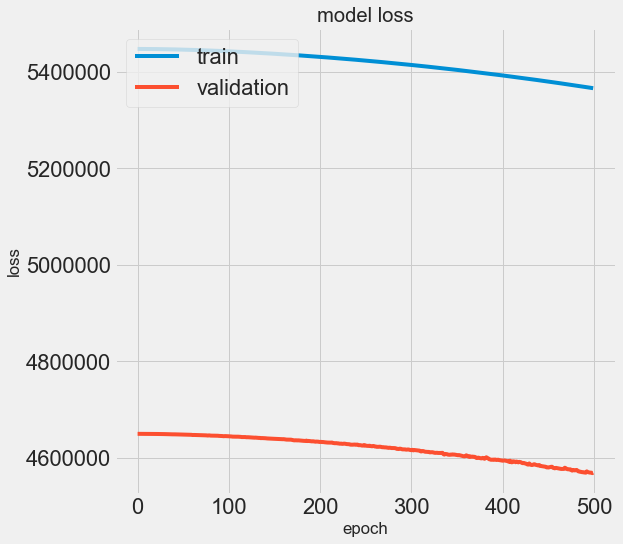

In [31]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='normal', activation='relu'))
# Add batch normalization for the outputs of the layer above
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))
model.summary()

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

#'mse','mae',

model.compile(loss='mae', optimizer='adam', metrics=[coeff_determination])
history = model.fit(X_train, y_train, epochs=500, batch_size=128,  verbose=1, validation_split=0.2,callbacks=callbacks_list)
print(history.history.keys())



# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

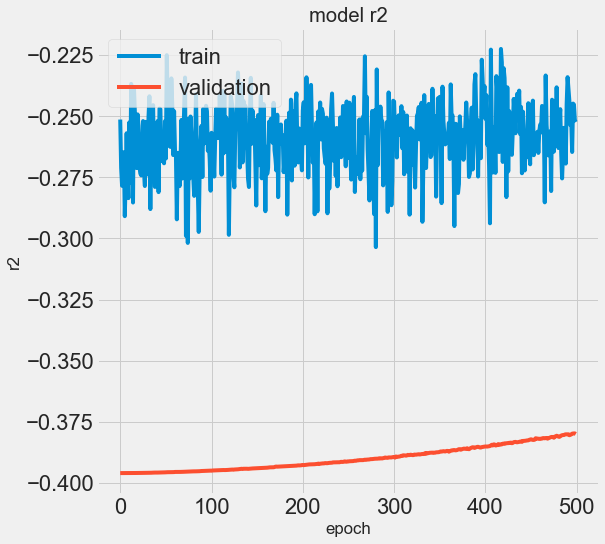

In [32]:
# "R2"
plt.plot(history.history['coeff_determination'])
plt.plot(history.history['val_coeff_determination'])
plt.title('model r2')
plt.ylabel('r2')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
# import the usual stuff
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import TPOT and sklearn stuff
from tpot import TPOTClassifier,TPOTRegressor
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import sklearn.metrics
import timeit

# instantiate tpot 
"""
tpot = TPOTRegressor(verbosity=3,  
                      random_state=25, 
                      n_jobs=-1, 
                      generations=5, 
                      population_size=10,
                      early_stop = 5,
                      memory = None)
"""
tpot = TPOTRegressor(verbosity=3, 
 random_state=10, 
 #scoring=rmsle,
 periodic_checkpoint_folder="any_string",
 n_jobs=-1, 
 generations=8, 
 population_size=80,
 early_stop=5,cv=5)

times = []
scores = []
winning_pipes = []
# run 3 iterations
for x in range(3):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_ames.py')
# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

29 operators have been imported by TPOT.


Saving periodic pipeline from pareto front to any_string\pipeline_gen_1_idx_0_2019.08.26_17-37-48.py
Saving periodic pipeline from pareto front to any_string\pipeline_gen_1_idx_1_2019.08.26_17-37-48.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' 

Saving periodic pipeline from pareto front to any_string\pipeline_gen_1_idx_0_2019.08.26_18-11-15.py
Saving periodic pipeline from pareto front to any_string\pipeline_gen_1_idx_1_2019.08.26_18-11-15.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' 

Saving periodic pipeline from pareto front to any_string\pipeline_gen_1_idx_0_2019.08.26_18-41-55.py
Saving periodic pipeline from pareto front to any_string\pipeline_gen_1_idx_1_2019.08.26_18-41-55.py
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required..
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' 

         verbose=False)]


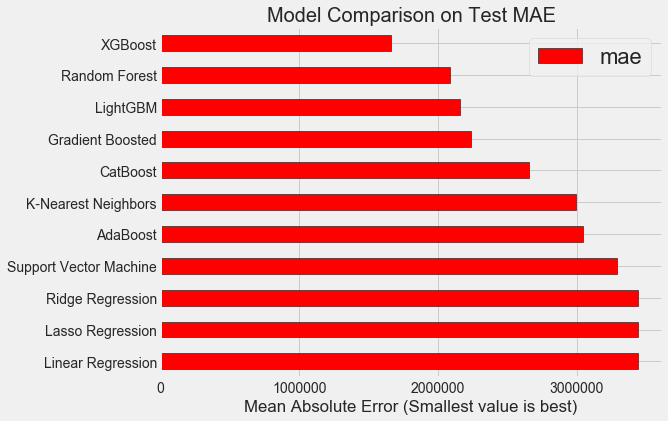

In [23]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'mae': [lr_mae,ridge_mae, lasso_mae, svm_mae, rf_mae, 
                                         gb_mae, knn_mae,xg_mae,catb_mae,adab_mae,lgbm_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

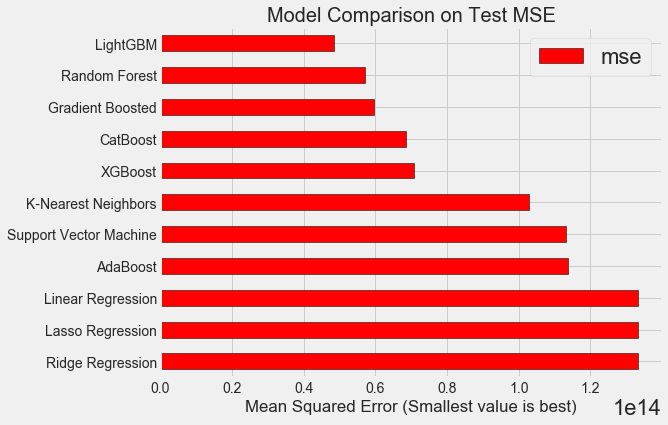

In [24]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'mse': [lr_mse, ridge_mse, lasso_mse, svm_mse, rf_mse, 
                                         gb_mse, knn_mse, xg_mse,catb_mse,adab_mse,lgbm_mse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mse', ascending = False).plot(x = 'model', y = 'mse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Squared Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MSE', size = 20);

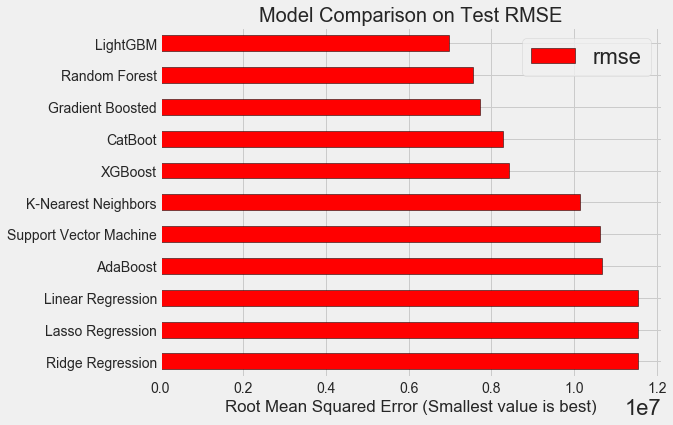

In [25]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoot','AdaBoost','LightGBM'],
                                 'rmse': [lr_rmse,ridge_rmse, lasso_rmse, svm_rmse, rf_rmse, 
                                         gb_rmse, knn_rmse, xg_rmse,catb_rmse,adab_rmse,lgbm_rmse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('rmse', ascending = False).plot(x = 'model', y = 'rmse', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Root Mean Squared Error (Smallest value is best)'); plt.xticks(size = 14)
plt.title('Model Comparison on Test RMSE', size = 20);

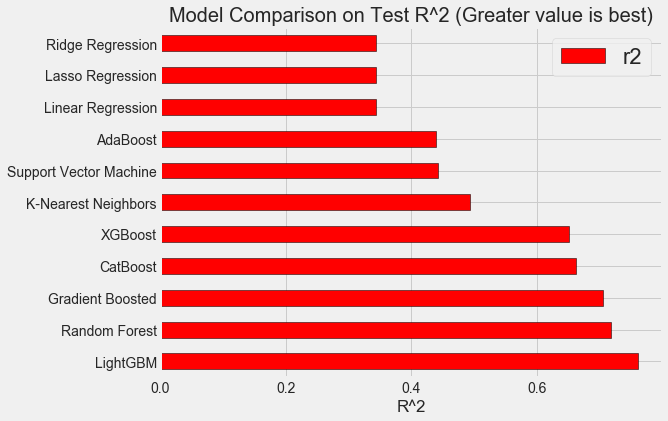

In [26]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression','Ridge Regression', 'Lasso Regression','Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors','XGBoost','CatBoost','AdaBoost','LightGBM'],
                                 'r2': [lr_r2, ridge_r2, lasso_r2, svm_r2, rf_r2, 
                                         gb_r2, knn_r2,xg_r2,catb_r2,adab_r2,lgbm_r2]})

# Horizontal bar chart of test mae
model_comparison.sort_values('r2', ascending = False).plot(x = 'model', y = 'r2', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('R^2'); plt.xticks(size = 14)
plt.title('Model Comparison on Test R^2 (Greater value is best)', size = 20);

In [27]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [28]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [29]:
# Fit on the training data
random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 15.2min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [30]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
8,108.674746,5.273142,0.261753,0.066309,1500,6,2,sqrt,10,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-1.651964e+06,-2.173752e+06,-1.986687e+06,-1.829132e+06,-1.910385e+06,192756.347148,1,-1.432905e+05,-1.032913e+05,-2.481701e+05,-2.505865e+05,-1.863346e+05,64616.022359
18,99.743249,2.097975,0.114246,0.006866,500,6,1,auto,15,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-1.778436e+06,-2.275777e+06,-2.041707e+06,-1.806805e+06,-1.975703e+06,201173.131602,2,-8.914484e+03,-4.326409e+03,-7.911112e+03,-7.960945e+03,-7.278237e+03,1750.515263
10,42.760497,0.931121,0.116998,0.007650,1100,10,6,None,10,huber,"{'n_estimators': 1100, 'min_samples_split': 10...",-1.789416e+06,-2.128505e+06,-2.211190e+06,-1.806821e+06,-1.983973e+06,188243.263664,3,-6.246246e+05,-5.553725e+05,-5.948956e+05,-5.953803e+05,-5.925682e+05,24619.412591
6,258.411679,8.100801,0.395499,0.030450,1500,6,2,sqrt,15,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-1.779434e+06,-2.272593e+06,-2.014394e+06,-1.870101e+06,-1.984148e+06,186465.440821,4,-1.160332e+05,-7.114150e+04,-1.763329e+05,-1.964502e+05,-1.399894e+05,49554.528314
20,39.465250,1.475765,0.089496,0.015941,500,6,1,sqrt,10,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-1.897415e+06,-2.294389e+06,-2.046290e+06,-1.754411e+06,-1.998168e+06,199779.010268,5,-5.850890e+04,-7.826387e+04,-7.134947e+04,-6.890838e+04,-6.925765e+04,7091.284557
11,63.119748,3.114613,0.218998,0.011292,1500,2,4,log2,10,lad,"{'n_estimators': 1500, 'min_samples_split': 2,...",-1.860153e+06,-2.108626e+06,-2.187631e+06,-1.859119e+06,-2.003874e+06,146917.924067,6,-7.061555e+05,-6.001340e+05,-7.000792e+05,-6.786053e+05,-6.712435e+05,42311.633676
2,56.500251,6.869206,0.095248,0.021819,500,4,2,auto,10,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-1.772180e+06,-2.211386e+06,-2.211805e+06,-1.843924e+06,-2.009816e+06,203367.202542,7,-1.972946e+05,-1.997196e+05,-2.745146e+05,-3.284200e+05,-2.499872e+05,54901.365788
4,101.529999,3.968898,0.223750,0.020930,900,6,6,sqrt,15,lad,"{'n_estimators': 900, 'min_samples_split': 6, ...",-1.806535e+06,-2.120643e+06,-2.240338e+06,-1.907947e+06,-2.018842e+06,170875.054581,8,-7.322423e+05,-6.597563e+05,-7.114730e+05,-6.672545e+05,-6.926815e+05,30202.541892
21,9.973495,0.180054,0.038502,0.012854,500,6,4,log2,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-1.924263e+06,-2.268864e+06,-2.468940e+06,-2.034809e+06,-2.174186e+06,210781.961672,9,-1.162725e+06,-1.070417e+06,-1.169836e+06,-1.150173e+06,-1.138288e+06,39812.361985
3,13.020503,1.005822,0.037745,0.018850,500,6,8,None,5,huber,"{'n_estimators': 500, 'min_samples_split': 6, ...",-1.987759e+06,-2.288926e+06,-2.510920e+06,-1.932683e+06,-2.180054e+06,234224.095749,10,-1.456555e+06,-1.381680e+06,-1.364623e+06,-1.366574e+06,-1.392358e+06,37647.607903


In [31]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=10,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'huber', max_depth = 15,
                                  min_samples_leaf = 1,
                                  min_samples_split = 6,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [33]:
# Fit the grid search
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.1min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=15,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=6,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
          

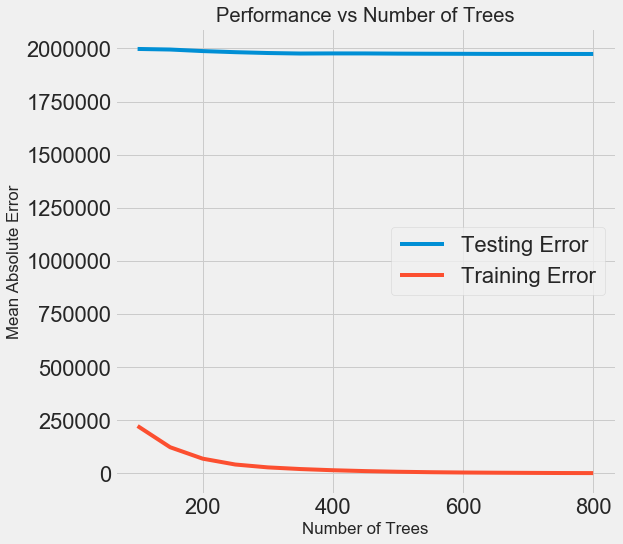

In [34]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Absolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [35]:
results.sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
14,158.748997,4.380527,0.184000,0.041936,800,{'n_estimators': 800},-1.778149e+06,-2.276387e+06,-2.041171e+06,-1.800467e+06,-1.974066e+06,202769.325467,1,-1125.026796,-666.334361,-1327.341802,-676.446747,-948.787427,286.492980
13,103.173002,4.408074,0.221744,0.014578,750,{'n_estimators': 750},-1.777959e+06,-2.276318e+06,-2.041516e+06,-1.800570e+06,-1.974113e+06,202796.081080,2,-1517.410574,-846.580132,-1959.810446,-865.030672,-1297.207956,468.341193
12,131.915248,3.287444,0.129251,0.019344,700,{'n_estimators': 700},-1.777936e+06,-2.276230e+06,-2.041704e+06,-1.801358e+06,-1.974329e+06,202616.295544,3,-2323.648325,-1186.360021,-2252.810939,-2110.730843,-1968.387532,457.967125
11,123.663800,2.932601,0.163747,0.026280,650,{'n_estimators': 650},-1.777815e+06,-2.276227e+06,-2.042109e+06,-1.801103e+06,-1.974336e+06,202732.658510,4,-2791.615026,-1503.025022,-3823.585648,-2807.243958,-2731.367413,823.278921
10,107.386248,2.913602,0.153499,0.020267,600,{'n_estimators': 600},-1.777390e+06,-2.276199e+06,-2.042503e+06,-1.803102e+06,-1.974821e+06,202433.072897,5,-3802.855419,-1848.508861,-4762.428841,-4310.179792,-3680.993228,1111.106213
9,120.083039,2.097900,0.190748,0.025608,550,{'n_estimators': 550},-1.778303e+06,-2.275951e+06,-2.042662e+06,-1.803682e+06,-1.975172e+06,202008.320783,6,-6053.121438,-2824.416111,-6000.334322,-5672.553745,-5137.606404,1343.454989
8,78.696248,1.490294,0.109000,0.007069,500,{'n_estimators': 500},-1.778436e+06,-2.275777e+06,-2.041707e+06,-1.806805e+06,-1.975703e+06,201173.131602,7,-8914.483791,-4326.408594,-7911.111908,-7960.944551,-7278.237211,1750.515263
5,68.594497,1.590833,0.074498,0.010403,350,{'n_estimators': 350},-1.777384e+06,-2.277416e+06,-2.041934e+06,-1.807875e+06,-1.976174e+06,201838.229367,8,-24283.909165,-15284.534255,-23501.373665,-17008.405453,-20019.555634,3930.496810
7,71.470250,2.058488,0.095749,0.006458,450,{'n_estimators': 450},-1.778215e+06,-2.275910e+06,-2.044116e+06,-1.807899e+06,-1.976557e+06,201247.700615,9,-12517.818403,-7151.353408,-11529.918865,-10084.585076,-10320.918938,2024.231177
6,76.511494,2.036757,0.089501,0.014724,400,{'n_estimators': 400},-1.779783e+06,-2.276536e+06,-2.043680e+06,-1.806646e+06,-1.976683e+06,201322.631932,10,-17135.006144,-11155.483776,-16510.671176,-12903.729111,-14426.222552,2484.861819


In [36]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=15,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
%%timeit -n 1 -r 5
default_model.fit(X_train, y_train)

510 ms ± 13.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [38]:
%%timeit -n 1 -r 5
final_model.fit(X_train, y_train)

1min 40s ± 5.88 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [39]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 2522856.1930.
Final model performance on the test set:   MAE = 1868822.8966.


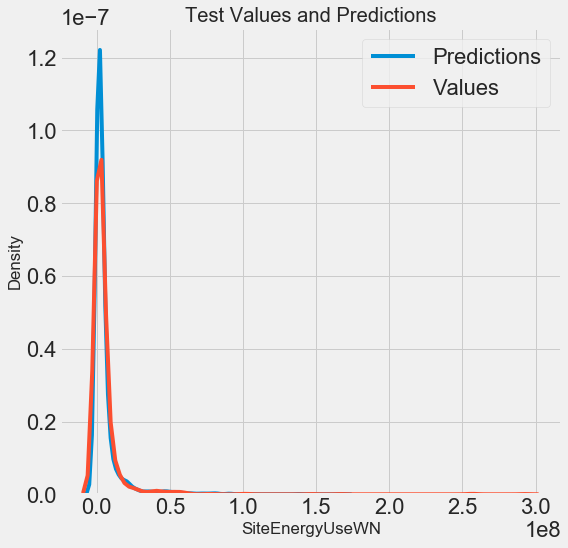

In [40]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('SiteEnergyUseWN'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

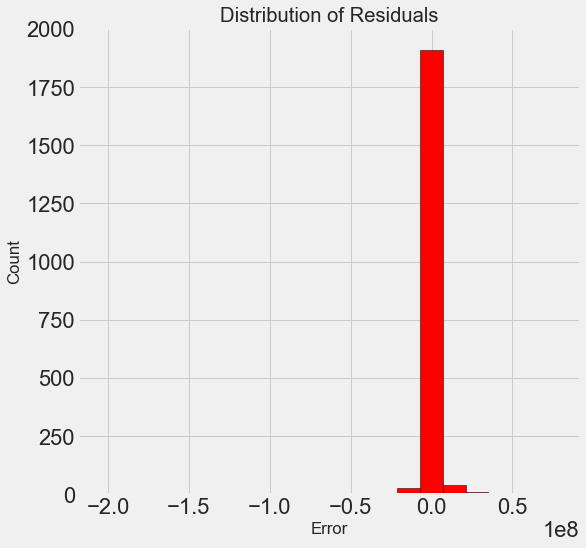

In [41]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');